# Assignment  on Linear Regression
* Regression analysis is likely the first and simplest of all of predictive models
* Very easy to interpret and can be classified as a supervised learning algorithms
* It estimates the relationship between a dependent variable we can also call it as target (y) & an independent variables ($x_{i}$) which is also known as predictor variables


$$y^{model}=\beta_{0}+\beta_{1}x_{1} + \beta_{2}x_{2} + .......+ \beta_{n}x_{n}$$
where, $\beta_{i}$ are the coefficients we need to determine.

-------------------------------------------------------------------------

## The Cost function

Lets us define the error as:

$$e_{i} = y_{i}^{actual} - y_{i}^{model}$$ 

From this error definition, we can find the expression for mean of square of error terms (also called cost function) for all data points as:

$$cost function \ (Mean \ Squared \ error) = \frac{1}{2n}\sum\limits_{i=1}^n e_{i}^2 = \frac{1}{2n} \sum\limits_{i=1}^n (y_{i}^{actual} - y_{i}^{model})^2$$

Linear regression looks for optimizing the coefficients ($\beta_{i}$) such that the cost function is minimized. 

For the minimization problem, you will use **Gradient Descent** method

-------------------------------------------------------------------------

# Questions
- <a href="#question1"> Question 1 (Summary and Visualization) </a>
- <a href="#question2"> Question 2 (Simple Linear Regression)  </a>
- <a href="#question3"> Question 3 (Regression Assumptions) </a>
- <a href="#question4"> Question 4 (Hypothesis Test)  </a>
- <a href="#question5"> Question 5 (Multivariate Analysis)</a>

***
#### Import libraries here you need to solve this Assignment:

In [70]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy.stats as ss
from sklearn.metrics import r2_score 
from sklearn import preprocessing

## Load the dataset
#### 'car_price1.csv' data set contains information about various features('boreratio', 'carlength', 'horsepower' etc) of cars and their 'prices'.
**'price' is dependent variable(y) whereas rest all columns are independent variables(x).**

In [4]:
data = pd.read_csv("car_price1.csv")
data

,boreratio,carlength,carwidth,compressionratio,enginesize,citympg,stroke,horsepower,highwaympg,price
0,3.47,168.8,64.1,22.1,130,21,69.2,111,27,13495.000
1,3.47,168.8,64.1,10.4,130,21,45.1,111,27,16500.000
2,2.68,171.2,65.5,12.0,152,19,69.3,154,26,16500.000
3,3.19,176.6,66.2,16.5,109,24,58.5,102,30,13950.000
4,3.19,176.6,66.4,17.9,136,18,58.4,115,22,17450.000
5,3.19,177.3,66.3,7.2,136,19,75.0,110,25,15250.000
6,3.19,192.7,71.4,11.8,136,19,23.5,110,25,17710.000
7,3.19,192.7,71.4,13.2,136,19,11.6,110,25,18920.000
8,3.13,192.7,71.4,4.8,131,17,1.0,140,20,23875.000
9,3.13,178.2,67.9,15.6,131,16,21.2,160,22,17859.167


-------------------------------------------------------------------------

<a id='question1'></a>
<font color='red' size=5>Question-1 (Summary and Visualization)</font>
1. Is there any missing or duplicate row present in 'car_price1.csv' file. Check it and delete those rows.
2. Do some Exploratory data analysis, like draw different plots which you might think can be informative (histograms, boxplots, scatter plots).
3. Make a box plot with all features on X-axis and price on Y-axis, all together in one plot (use seaborn library to plot this).
4. Draw pairplot  and heatmap between features.
5. Comment which features have significant correlation (95% significant::0.35).

# 1.a Checking duplicate values in the data set

In [5]:
data_duplicate = data[data.duplicated()]
data_duplicate

,boreratio,carlength,carwidth,compressionratio,enginesize,citympg,stroke,horsepower,highwaympg,price


In [6]:
# There is no duplicate value in the Data Frame

# 1.b Checking missing values in the data set

In [7]:
data_missing = data[data.notnull()]
len(data_missing.index)

205

In [8]:
# There is no missing values in the Data Frame

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
boreratio           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
compressionratio    205 non-null float64
enginesize          205 non-null int64
citympg             205 non-null int64
stroke              205 non-null float64
horsepower          205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
dtypes: float64(6), int64(4)
memory usage: 16.1 KB


# 2.a. Plotting hist graph

Text(0.5, 1.0, 'Price')

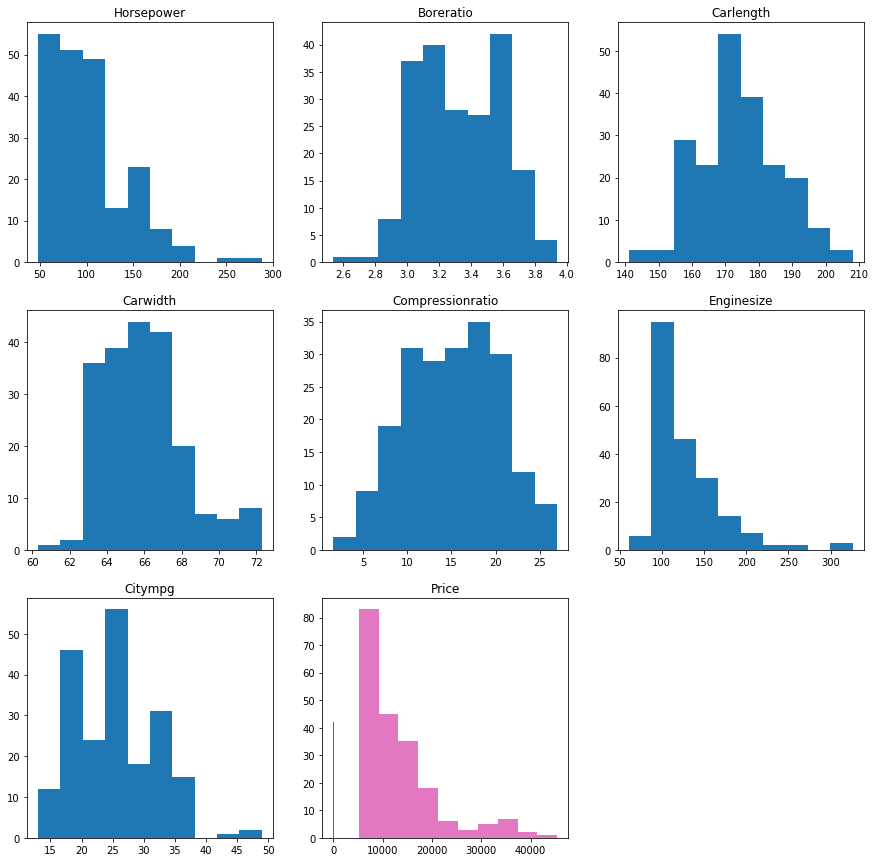

In [10]:
plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
plt.hist(data["horsepower"])
plt.title("Horsepower")

plt.subplot(3,3,2)
plt.hist(data["boreratio"])
plt.title("Boreratio")

plt.subplot(3,3,3)
plt.hist(data["carlength"])
plt.title("Carlength")

plt.subplot(3,3,4)
plt.hist(data["carwidth"])
plt.title("Carwidth")

plt.subplot(3,3,5)
plt.hist(data["compressionratio"])
plt.title("Compressionratio")

plt.subplot(3,3,6)
plt.hist(data["enginesize"])
plt.title("Enginesize")

plt.subplot(3,3,7)
plt.hist(data["citympg"])
plt.title("Citympg")

plt.subplot(3,3,8)
plt.hist(data["stroke"])
plt.title("Stroke")

plt.plot(3,3,9)
plt.hist(data["highwaympg"])
plt.title("Highwaympg")

plt.plot(3,3,10)
plt.hist(data["price"])
plt.title("Price")

# 2.b. Plotting boxplot

Text(0.5, 1.0, 'Price')

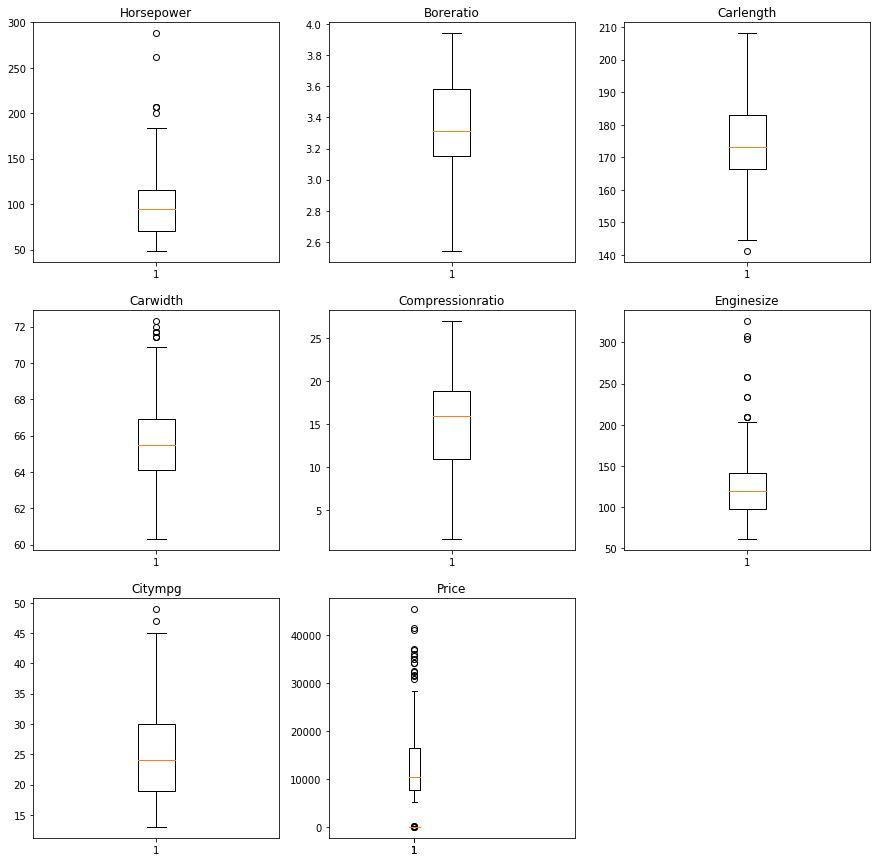

In [11]:
plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
plt.boxplot(data["horsepower"])
plt.title("Horsepower")

plt.subplot(3,3,2)
plt.boxplot(data["boreratio"])
plt.title("Boreratio")

plt.subplot(3,3,3)
plt.boxplot(data["carlength"])
plt.title("Carlength")

plt.subplot(3,3,4)
plt.boxplot(data["carwidth"])
plt.title("Carwidth")

plt.subplot(3,3,5)
plt.boxplot(data["compressionratio"])
plt.title("Compressionratio")

plt.subplot(3,3,6)
plt.boxplot(data["enginesize"])
plt.title("Enginesize")

plt.subplot(3,3,7)
plt.boxplot(data["citympg"])
plt.title("Citympg")

plt.subplot(3,3,8)
plt.boxplot(data["stroke"])
plt.title("Stroke")

plt.plot(3,3,9)
plt.boxplot(data["highwaympg"])
plt.title("Highwaympg")

plt.plot(3,3,10)
plt.boxplot(data["price"])
plt.title("Price")

# 2.c. Plotting scatter plot with price on y-axis 

Text(0, 0.5, 'Price')

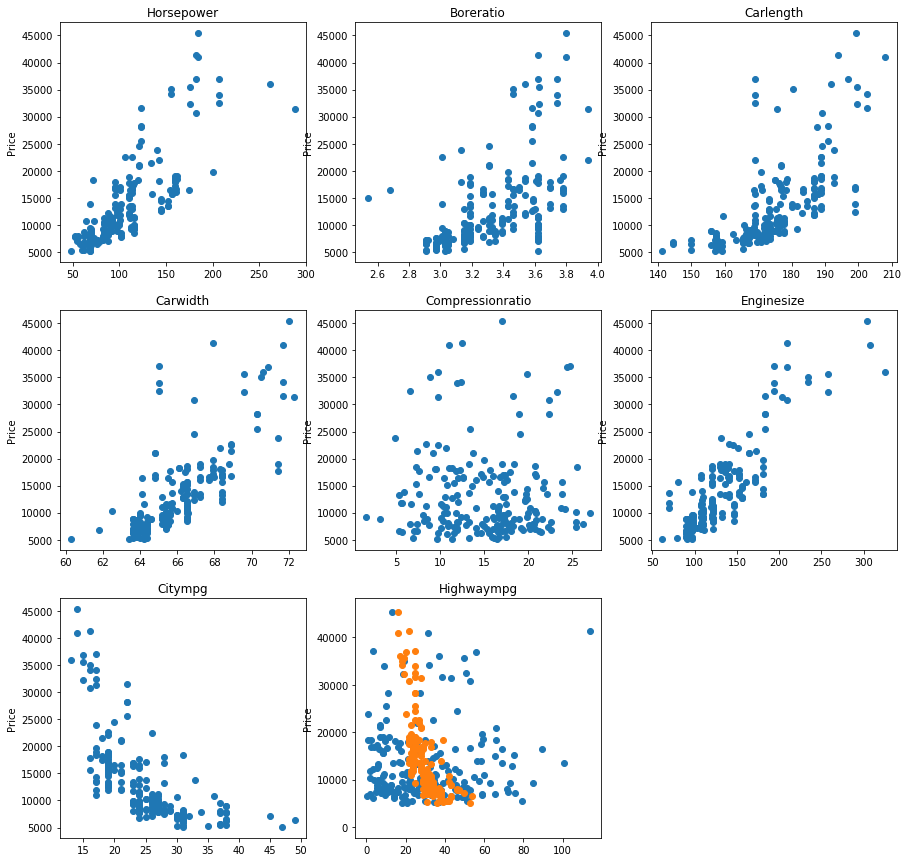

In [12]:
plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
plt.scatter(data["horsepower"],data['price'])
plt.title("Horsepower")
plt.ylabel("Price")

plt.subplot(3,3,2)
plt.scatter(data["boreratio"],data['price'])
plt.title("Boreratio")
plt.ylabel("Price")

plt.subplot(3,3,3)
plt.scatter(data["carlength"],data['price'])
plt.title("Carlength")
plt.ylabel("Price")

plt.subplot(3,3,4)
plt.scatter(data["carwidth"],data['price'])
plt.title("Carwidth")
plt.ylabel("Price")

plt.subplot(3,3,5)
plt.scatter(data["compressionratio"],data['price'])
plt.title("Compressionratio")
plt.ylabel("Price")

plt.subplot(3,3,6)
plt.scatter(data["enginesize"],data['price'])
plt.title("Enginesize")
plt.ylabel("Price")

plt.subplot(3,3,7)
plt.scatter(data["citympg"],data['price'])
plt.title("Citympg")
plt.ylabel("Price")

plt.subplot(3,3,8)
plt.scatter(data["stroke"],data['price'])
plt.title("Stroke")
plt.ylabel("Price")

plt.plot(3,3,9)
plt.scatter(data["highwaympg"],data['price'])
plt.title("Highwaympg")
plt.ylabel("Price")

# 3. Plotting boxplot with features on x-axis and price on y-axis

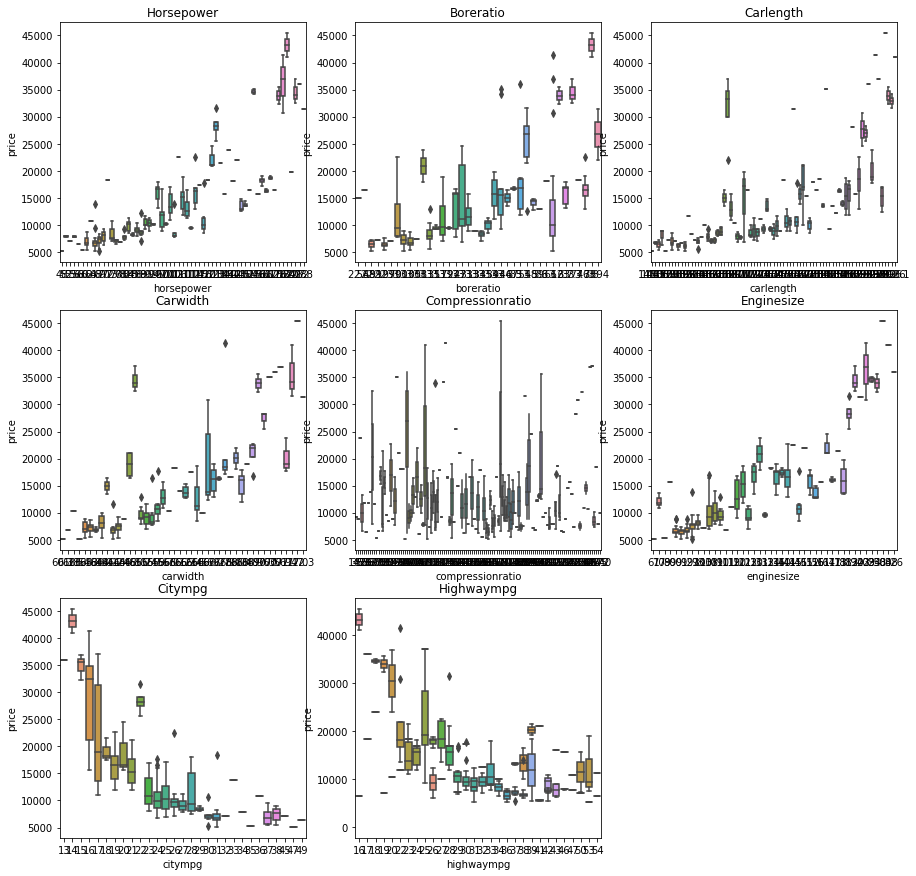

In [13]:
plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
sns.boxplot(x = data["horsepower"], y = data['price'], data = data)
plt.title("Horsepower")

plt.subplot(3,3,2)
sns.boxplot(x = data["boreratio"], y = data['price'], data = data)
plt.title("Boreratio")

plt.subplot(3,3,3)
sns.boxplot(x = data["carlength"], y = data['price'], data = data)
plt.title("Carlength")

plt.subplot(3,3,4)
sns.boxplot(x = data["carwidth"], y = data['price'], data =data)
plt.title("Carwidth")

plt.subplot(3,3,5)
sns.boxplot(x = data["compressionratio"], y = data['price'], data = data)
plt.title("Compressionratio")

plt.subplot(3,3,6)
sns.boxplot(x = data["enginesize"], y = data['price'], data =  data)
plt.title("Enginesize")

plt.subplot(3,3,7)
sns.boxplot(x = data["citympg"], y = data['price'], data = data)
plt.title("Citympg")

plt.subplot(3,3,8)
sns.boxplot(x = data["stroke"], y = data['price'], data = data)
plt.title("Stroke")

plt.plot(3,3,9)
sns.boxplot(x = data["highwaympg"], y = data['price'], data = data)
plt.title("Highwaympg")

plt.show()

# 4.a Pair Plot between Features

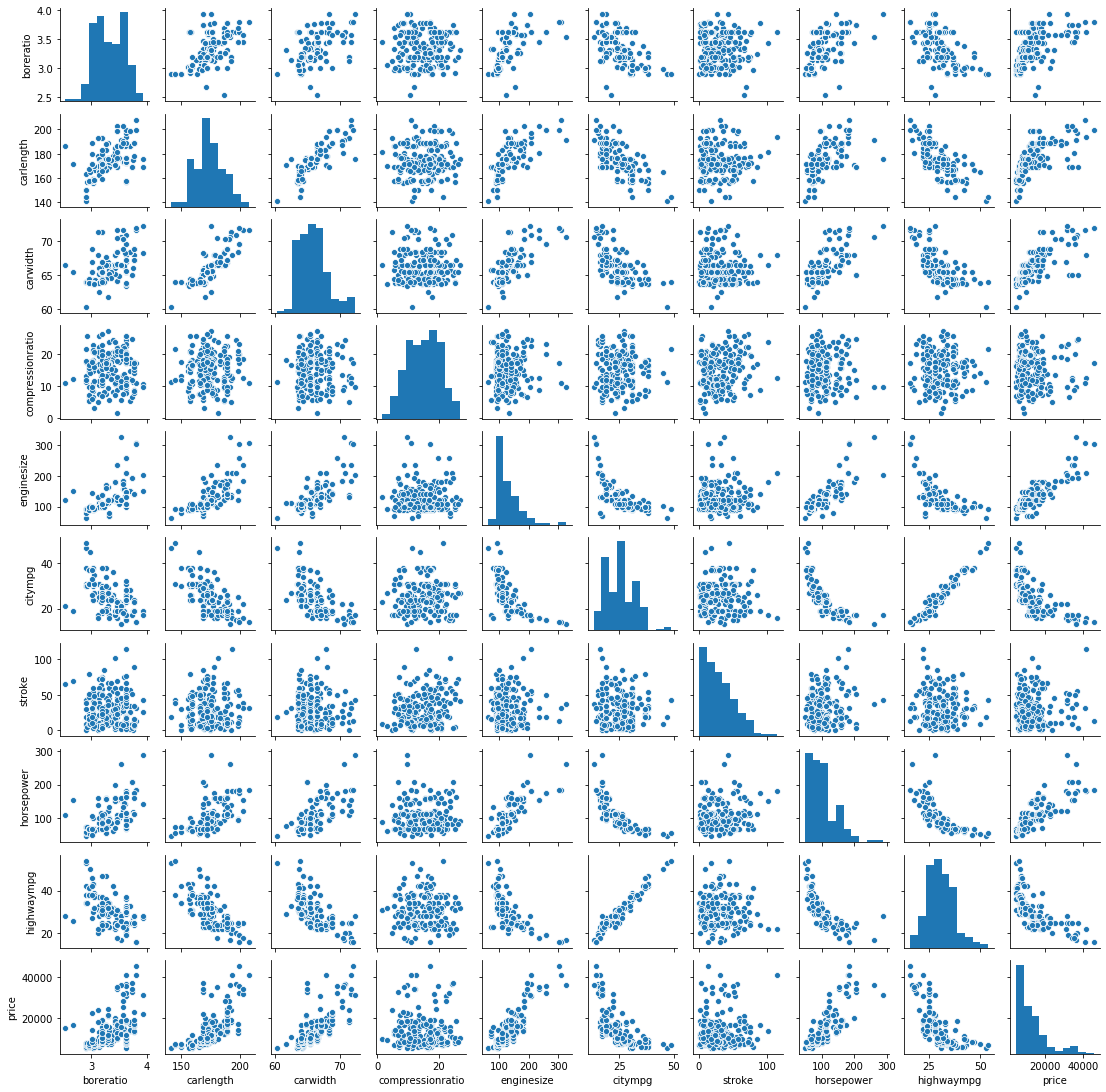

In [14]:
data_pp = sns.pairplot(data)
data_pp.fig.set_figheight(15)
data_pp.fig.set_figwidth(15)
plt.show()

# 4.b Heat Plot between Features

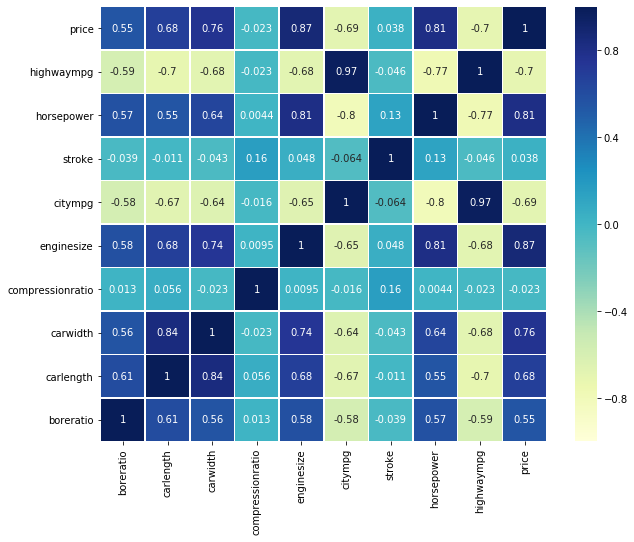

In [15]:
data_c = data.corr()
fig, axes = plt.subplots(figsize=(10,8))
ax = sns.heatmap(data_c, vmin = -1, vmax = 1, annot = True, ax = axes, cmap="YlGnBu", linewidth=0.5)
ax.set_xlim(0,10)
ax.set_ylim(0,10)
plt.show()

In [16]:
'''
By seeing the heat map:

1. Stroke and price correlation is greater than 0.35 so its significance is greater than 95%
2. highwaympg and citympg correlation is maximum with value 0.97
3. carwidth and highwaympg has minimum correlation with value -0.68
4. enginesize and highwaympg has minimum correlation with value -0.68
5. higwaympg and carfwidth has minimum correlation with value -0.68
6. higwaympg and carlength has least correlation with value -7
7. with respect to price we can say that the maximum correlation is between enginesize and price.'''

'\nBy seeing the heat map:\n\n1. Stroke and price correlation is greater than 0.35 so its significance is greater than 95%\n2. highwaympg and citympg correlation is maximum with value 0.97\n3. carwidth and highwaympg has minimum correlation with value -0.68\n4. enginesize and highwaympg has minimum correlation with value -0.68\n5. higwaympg and carfwidth has minimum correlation with value -0.68\n6. higwaympg and carlength has least correlation with value -7\n7. with respect to price we can say that the maximum correlation is between enginesize and price.'

-------------------------------------------------------------------------

<a id='question2'></a>
<font color='red' size=5> Question-2 (Simple Linear regression)</font>
#### For implementation of this question, create a dataframe 'df1' having columns 'carlength', 'boreratio', 'highwaympg' and 'price'.
1. Split data into train set and test set with default test_size. 
2. Fit the regression lines between 'carlength', 'boreratio' and 'highwaympg' with respect to 'price', seperately. Here build your own algorithms for computing cost-function and to optimize the coefficients. For example: As explained in the lecture.
3. Find R^2 score on both train and test set.
4. Which features out of 'carlength', 'boreratio' and 'highwaympg' contribute maximum and least to the price of car?
5. Use stats model library to do Linear regression and compare its results with yours.

In [71]:
# Splitting data into training set and testing set

train_data, test_data = train_test_split(data, test_size = 0.3)

In [18]:
# Making a new Data Frame

df1 = data.filter(["carlength","boreratio","highwaympg","price"])
df1

,carlength,boreratio,highwaympg,price
0,168.8,3.47,27,13495.000
1,168.8,3.47,27,16500.000
2,171.2,2.68,26,16500.000
3,176.6,3.19,30,13950.000
4,176.6,3.19,22,17450.000
5,177.3,3.19,25,15250.000
6,192.7,3.19,25,17710.000
7,192.7,3.19,25,18920.000
8,192.7,3.13,20,23875.000
9,178.2,3.13,22,17859.167


In [19]:
# Beta

beta0 = 2
beta1 = 2

# 2.a Carlength and Price

In [20]:
# Splitting carlength data and price data into training set and testing set with ratio (7:3)

train_carl, test_carl, train_price, test_price = train_test_split(df1['carlength'],df1['price'], test_size = 0.3)

In [21]:
# length of Training data and testing data 

print(len(train_carl))
print(len(test_carl))
print(type(train_carl))

143
62
<class 'pandas.core.series.Series'>


In [22]:
# length of Training data and testing data 

print(len(train_price))
print(len(test_price))

143
62


In [23]:
# Type of train_carl (training data of carlength)

type(train_carl)

pandas.core.series.Series

In [24]:
# Changing of type of train_carl from Series to Array

traindata_carl = np.array(train_carl.values.tolist())
type(traindata_carl)

numpy.ndarray

In [25]:
# Changing of type of test_carl from Series to Array

testdata_carl = np.array(test_carl.values.tolist())
type(testdata_carl)

numpy.ndarray

In [26]:
# Type of train_price (training data of price)

type(train_price)

pandas.core.series.Series

In [27]:
# Changing of type of train_price from Series to Array

traindata_price = np.array(train_price.values.tolist())
type(traindata_price)

numpy.ndarray

In [28]:
# Adding a bias Unit

train_carl_1 = np.insert(traindata_carl.reshape((len(traindata_carl), 1)), 0, 1, axis=1)
train_price_1 = traindata_price.reshape((len(traindata_price), 1))
print(train_carl_1.shape, train_price_1.shape)

(143, 2) (143, 1)


In [29]:
train_carl_1.dtype

dtype('float64')

In [30]:
train_price_1.dtype

dtype('float64')

In [33]:
# Cost function 

def cost_fn(x, y_actual, beta):
    n=len(x)
    ym = x.dot(beta)
    e=ym-y_actual
    mse=sum((e)**2)/(2*n)
    return mse[0]

In [34]:
# Minibatch gradient

def minibatch_grad(x, y, beta, alpha = 0.00001, max_iterate = 300, min_cost = 0.001, batch_size = 10):
    n = len(x)
    mean_square = []
    i = 0
    while(i<=max_iterate):
        i+=1
        Mi = np.random.permutation(n)
        X = x[Mi]
        yc = y[Mi]
        for j in range(0 ,batch_size):
            Xi = X[j:j+batch_size,:]
            yi = yc[j:j+batch_size]
            ym = Xi.dot(beta)
            e=ym-yi
            beta -= (1/batch_size)*alpha*(Xi.T.dot(e))
        mean_square.append(cost_fn(Xi, yi, beta))
    return beta, mean_square

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """


Actual beta_0    :  2
Actual beta_1    :  [[-15.91186794]
 [ 68.25921822]]

Error Mini-batch :  7687706.754014197
trained_beta_0   :  -15.911867938986546
trained_beta_1   :  68.25921822448086
no. of Iteration :  301


(0, 84624767.61952046)

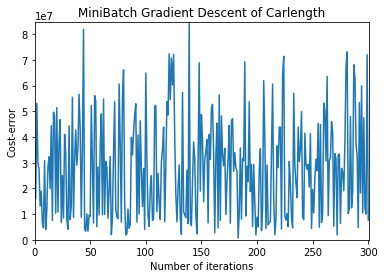

In [35]:
# Mini-Batch Gradient for carlength and price

alpha = 0.00002
beta = np.array([[1],[1]])
beta1 = beta.astype('Float64')
#beta = np.ones((train_carl_1.shape[1],1))
beta_trained, mean_sq = minibatch_grad(train_carl_1, train_price_1, beta1, alpha, max_iterate = 300, min_cost=0.05)

print("Actual beta_0    : ", beta0)
print("Actual beta_1    : ", beta1)
print("\nError Mini-batch : ", mean_sq[-1])
print("trained_beta_0   : ", beta_trained[0,0])
print("trained_beta_1   : ", beta_trained[1,0])
print("no. of Iteration : ", len(mean_sq))
plt.plot(list(range(0, len(mean_sq))),mean_sq)
plt.xlabel("Number of iterations")
plt.ylabel("Cost-error")
plt.title('MiniBatch Gradient Descent of Carlength')
plt.xlim((0,len(mean_sq)))
plt.ylim((0,max(mean_sq)))

# 2.b Highwaympg and Price

In [36]:
# Splitting highwaympg data and price data into training set and testing set with ratio (7:3)

train_highway, test_highway = train_test_split(df1['highwaympg'], test_size = 0.3)

In [37]:
# length of Training data and testing data 

print(len(train_highway))
print(len(test_highway))
print(type(train_highway))

143
62
<class 'pandas.core.series.Series'>


In [38]:
# Type of train_highway (training data of highwaympg)

type(train_highway)

pandas.core.series.Series

In [39]:
# Changing of type of train_highway from Series to Array

traindata_highway = np.array(train_highway.values.tolist())
type(traindata_highway)

numpy.ndarray

In [40]:
# Changing of type of test_highway from Series to Array

testdata_highway = np.array(test_highway.values.tolist())
type(testdata_highway)

numpy.ndarray

In [41]:
# Adding a bias Unit

train_highway_1 = np.insert(traindata_highway.reshape((len(traindata_highway), 1)), 0, 1, axis=1)
print(train_highway_1.shape, train_price_1.shape)

(143, 2) (143, 1)


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """


Actual beta_0    :  2
Actual beta_1    :  [[ 22.33829616]
 [412.88162783]]

Error Mini-batch :  28457193.815893866
trained_beta_0   :  22.33829616154499
trained_beta_1   :  412.88162782825333
no. of Iteration :  101


(0, 206970153.9293686)

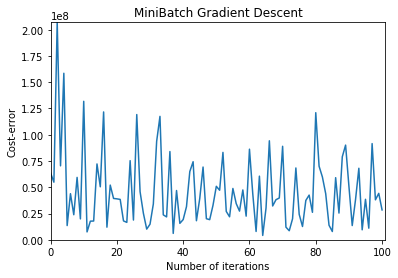

In [42]:
# Mini-Batch Gradient for boreratio and price

alpha = 0.00001
beta = np.array([[1],[1]])
beta1 = beta.astype('Float64')
#beta = np.ones((train_carl_1.shape[1],1))
beta_trained_highway, mean_sq_highway = minibatch_grad(train_highway_1, train_price_1, beta1, alpha, max_iterate = 100, min_cost=0.05)

print("Actual beta_0    : ", beta0)
print("Actual beta_1    : ", beta1)
print("\nError Mini-batch : ", mean_sq_highway[-1])
print("trained_beta_0   : ", beta_trained_highway[0,0])
print("trained_beta_1   : ", beta_trained_highway[1,0])
print("no. of Iteration : ", len(mean_sq_highway))
plt.plot(list(range(0, len(mean_sq_highway))),mean_sq_highway)
plt.xlabel("Number of iterations")
plt.ylabel("Cost-error")
plt.title('MiniBatch Gradient Descent')
plt.xlim((0,len(mean_sq_highway)))
plt.ylim((0,max(mean_sq_highway)))

# 2.c Boreratio and price

In [43]:
# Splitting boreratio data and price data into training set and testing set with ratio (7:3)

train_bore, test_bore = train_test_split(df1['boreratio'], test_size = 0.3)

In [44]:
# length of Training data and testing data 

print(len(train_bore))
print(len(test_bore))
print(type(train_bore))

143
62
<class 'pandas.core.series.Series'>


In [45]:
# Type of train_bore (training data of boreratio)

type(train_bore)

pandas.core.series.Series

In [46]:
# Changing of type of train_bore from Series to Array

traindata_bore = np.array(train_bore.values.tolist())
type(traindata_bore)

numpy.ndarray

In [47]:
# Changing of type of test_bore from Series to Array

testdata_bore = np.array(test_bore.values.tolist())
type(testdata_bore)

numpy.ndarray

In [48]:
# Adding a bias Unit

train_bore_1 = np.insert(traindata_bore.reshape((len(traindata_bore), 1)), 0, 1, axis=1)
print(train_bore_1.shape, train_price_1.shape)

(143, 2) (143, 1)


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """


Actual beta_0    :  2
Actual beta_1    :  [[129.4741006 ]
 [429.25046875]]

Error Mini-batch :  90239969.66639513
trained_beta_0   :  129.47410060236194
trained_beta_1   :  429.2504687547994
no. of Iteration :  101


(0, 271831315.3534776)

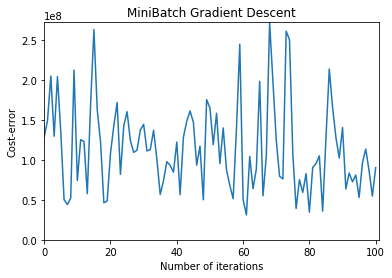

In [49]:
# Mini-Batch Gradient for boreratio and price

alpha = 0.00001
beta = np.array([[1],[1]])
beta1 = beta.astype('Float64')
#beta = np.ones((train_carl_1.shape[1],1))
beta_trained_bore, mean_sq_bore = minibatch_grad(train_bore_1, train_price_1, beta1, alpha, max_iterate = 100, min_cost=0.05)

print("Actual beta_0    : ", beta0)
print("Actual beta_1    : ", beta1)
print("\nError Mini-batch : ", mean_sq_bore[-1])
print("trained_beta_0   : ", beta_trained_bore[0,0])
print("trained_beta_1   : ", beta_trained_bore[1,0])
print("no. of Iteration : ", len(mean_sq_bore))
plt.plot(list(range(0, len(mean_sq_bore))),mean_sq_bore)
plt.xlabel("Number of iterations")
plt.ylabel("Cost-error")
plt.title('MiniBatch Gradient Descent')
plt.xlim((0,len(mean_sq_bore)))
plt.ylim((0,max(mean_sq_bore)))

In [59]:
# Rsquare value 

def r2_value(x,y,para):
    y_mean = np.mean(y)
    y_model = x.dot(para)
    ss_reg = np.sum((y_model-y_mean)**2)
    ss_tot = np.sum((y-y_mean)**2)
    ss_rss = sum((y-y_model)**2)
    return (1-ss_rss/ss_tot)

In [60]:
# Rsquare value of carlength table

r2_value(train_carl_1, train_price_1, beta_trained)

array([0.08032017])

In [62]:
# Rsquare value of boreratio

r2_value(train_bore_1, train_price_1, beta_trained_bore)

array([-2.05240499])

In [61]:
# Rsquare value of highwaymp

r2_value(train_highway_1, train_price_1, beta_trained_highway)

array([-0.20863128])

In [63]:
y = beta_trained[0] + beta_trained[1]*traindata_carl

In [64]:
print(r2_score(traindata_price, y))

0.08032017181134066


In [65]:
y1 = beta_trained_bore[0] + beta_trained_bore[1]*traindata_bore

In [69]:
print(r2_score(traindata_price, y1))

-2.0524049939152


In [67]:
y2 = beta_trained_highway[0] + beta_trained_highway[1]*traindata_highway

In [68]:
print(r2_score(traindata_price, y2))

-0.20863127797952918


-------------------------------------------------------------------------

<a id='question4'></a>
<font color='red' size=5>Question-3 (Hypothesis test)</font>

1. Lets assume the null hypothesis that there is no relation between 'enginesize' and 'price' as well as 'stroke' and 'price'. Will you accept this null hypothesis or reject it? Give a quantified statement in terms of p-value. 

Hint: Use statsmodel library

In [51]:
# Finding Pvalue
# We reject this null hypothesis

ss.ttest_ind(data["enginesize"], data["price"], equal_var=False).pvalue

3.856355797563103e-60

In [52]:
# Finding Pvalue
# We reject this null hypothesis

ss.ttest_ind(data["stroke"], data["price"], equal_var=False).pvalue

1.2877979489454545e-60

-------------------------------------------------------------------------

-------------------------------------------------------------------------